## Classification demo including training

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory('dataset\\training_set',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [12]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [14]:
## Importng test data
test_set = test_datagen.flow_from_directory('dataset\\test_set',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [24]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=100,
        validation_data=test_set
        )

Epoch 1/100
4/4 [==============================] - 1s 154ms/step - loss: 0.7750 - accuracy: 0.5816 - val_loss: 0.8510 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 1s 144ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 1s 135ms/step - loss: 0.6922 - accuracy: 0.5714 - val_loss: 0.7153 - val_accuracy: 0.3684
Epoch 4/100
4/4 [==============================] - 0s 122ms/step - loss: 0.6864 - accuracy: 0.5306 - val_loss: 0.7407 - val_accuracy: 0.5263
Epoch 5/100
4/4 [==============================] - 0s 117ms/step - loss: 0.6800 - accuracy: 0.5510 - val_loss: 0.6780 - val_accuracy: 0.4474
Epoch 6/100
4/4 [==============================] - 0s 124ms/step - loss: 0.6682 - accuracy: 0.6020 - val_loss: 0.7200 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 1s 131ms/step - loss: 0.6568 - accuracy: 0.5918 - val_loss: 0.7199 - val_accuracy: 0.5263
Epoch 8/100
4

Epoch 59/100
4/4 [==============================] - 1s 127ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.7445 - val_accuracy: 0.6053
Epoch 60/100
4/4 [==============================] - 1s 139ms/step - loss: 9.9807e-04 - accuracy: 1.0000 - val_loss: 1.2322 - val_accuracy: 0.6053
Epoch 61/100
4/4 [==============================] - 0s 119ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.5789
Epoch 62/100
4/4 [==============================] - 0s 117ms/step - loss: 7.8836e-04 - accuracy: 1.0000 - val_loss: 1.7002 - val_accuracy: 0.5789
Epoch 63/100
4/4 [==============================] - 1s 126ms/step - loss: 8.1790e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.5526
Epoch 64/100
4/4 [==============================] - 0s 113ms/step - loss: 6.4504e-04 - accuracy: 1.0000 - val_loss: 5.0487 - val_accuracy: 0.5263
Epoch 65/100
4/4 [==============================] - 0s 124ms/step - loss: 6.5030e-04 - accuracy: 1.0000 - val_loss: 3.6515 - val_acc

## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

In [25]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('dataset\\single_prediction\\dog.jpg'
                           ,target_size =(64,64))


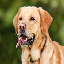

In [26]:
test_image

In [27]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [28]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [29]:
result = classifier.predict(test_image)

In [30]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [33]:
prediction

'dog'

In [23]:
#steps_per_epoch=50